In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [8]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')
sample_sub = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')

In [9]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
train.Survived.value_counts()/len(train)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [13]:
train.Pclass.value_counts()/len(train)

3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64

In [14]:
test.Pclass.value_counts()/len(test)

3    0.521531
1    0.255981
2    0.222488
Name: Pclass, dtype: float64

In [15]:
train.Embarked.value_counts()/len(train)

S    0.722783
C    0.188552
Q    0.086420
Name: Embarked, dtype: float64

In [16]:
test.Embarked.value_counts()/len(test)

S    0.645933
C    0.244019
Q    0.110048
Name: Embarked, dtype: float64

In [17]:
train.Sex.value_counts()/len(train)

male      0.647587
female    0.352413
Name: Sex, dtype: float64

In [18]:
test.Sex.value_counts()/len(test)

male      0.636364
female    0.363636
Name: Sex, dtype: float64

In [19]:
train[(train.Sex=='female') & (train.Survived==1)].count()/train[(train.Survived==1)].count()

PassengerId    0.681287
Survived       0.681287
Pclass         0.681287
Name           0.681287
Sex            0.681287
Age            0.679310
SibSp          0.681287
Parch          0.681287
Ticket         0.681287
Fare           0.681287
Cabin          0.669118
Embarked       0.679412
dtype: float64

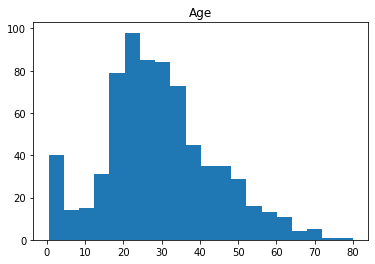

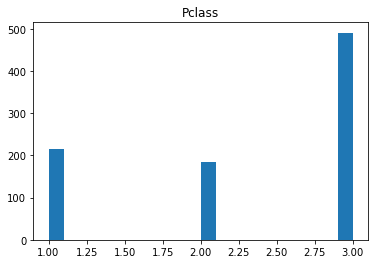

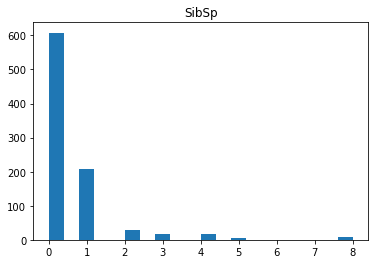

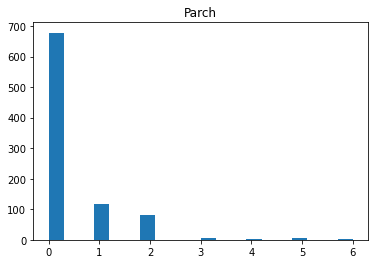

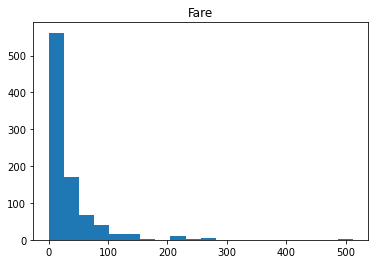

In [20]:
#Plot Histograms

%matplotlib inline
import matplotlib.pyplot as plt
def plot_hist(ser, bins=20):
    plt.figure(facecolor=(1, 1, 1))
    plt.hist(ser, bins=bins)
    plt.title(ser.name)
    plt.show()
    
plot_hist(train['Age'])
plot_hist(train['Pclass'])
plot_hist(train['SibSp'])
plot_hist(train['Parch'])
plot_hist(train['Fare'])

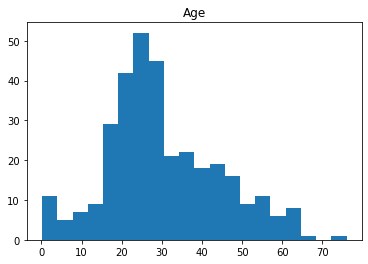

In [21]:
plot_hist(test['Age'])

In [22]:
#Categorical and Numerical Attributes

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline

num_attr = ['Age', 'Fare', 'SibSp', 'Parch']
cat_attr = ['Sex', 'Embarked', 'Pclass']

#Separate the label
X = train.drop('Survived',  axis=1)
y = train['Survived'].copy()


#Transformer to Impute categorical attr with 'most frequent'

class CatImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.imp_val_ = pd.Series([X[c].value_counts().index[0] for c in X], 
                                 index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.imp_val_)
    
dummy_pipeline = Pipeline([('dummy', None)])

cat_pipeline = Pipeline([
                        ('cat_imputer', CatImputer()),
                        ('ohe', OneHotEncoder())
                        ])

num_pipeline = Pipeline([
                        ('num_imputer', SimpleImputer(strategy='median')),
                        ('scaler', StandardScaler()),
                        ])

feat_pipeline = ColumnTransformer([
                        ('num', num_pipeline, num_attr),
                        ('cat', cat_pipeline, cat_attr)
                        ])

X_train = feat_pipeline.fit_transform(X)

In [23]:
X_train.shape

(891, 12)

In [24]:
X.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [25]:
cat_cols = list(feat_pipeline.named_transformers_['cat']\
            .named_steps['ohe'].get_feature_names(cat_attr))
X_cols = num_attr + cat_cols
X_cols

['Age',
 'Fare',
 'SibSp',
 'Parch',
 'Sex_female',
 'Sex_male',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S',
 'Pclass_1',
 'Pclass_2',
 'Pclass_3']

In [46]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.base import clone
from lightgbm import LGBMClassifier

lgb = LGBMClassifier()

skfolds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# for train_id, val_id in skfolds.split(X_train, y):
#     clone_clf = clone(lgb)
#     X_train_f = X_train[train_id]
#     y_train_f = y[train_id]
#     X_val = X_train[val_id]
#     y_val = y[val_id]
    
param_grid = {
                'n_estimators': [128, 136],
                'learning_rate': [0.03, 0.05],
                'max_depth': [26, 32],
                'reg_lambda': [0.008, 0.01],
                'num_leaves': [256]
             }

gsearch = GridSearchCV(lgb, param_grid, cv=skfolds, refit=True,
                     scoring='f1', verbose=3)
gsearch.fit(X_train, y)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV 1/3] END learning_rate=0.03, max_depth=26, n_estimators=128, num_leaves=256, reg_lambda=0.008; total time=   0.1s
[CV 2/3] END learning_rate=0.03, max_depth=26, n_estimators=128, num_leaves=256, reg_lambda=0.008; total time=   0.1s
[CV 3/3] END learning_rate=0.03, max_depth=26, n_estimators=128, num_leaves=256, reg_lambda=0.008; total time=   0.1s
[CV 1/3] END learning_rate=0.03, max_depth=26, n_estimators=128, num_leaves=256, reg_lambda=0.01; total time=   0.1s
[CV 2/3] END learning_rate=0.03, max_depth=26, n_estimators=128, num_leaves=256, reg_lambda=0.01; total time=   0.1s
[CV 3/3] END learning_rate=0.03, max_depth=26, n_estimators=128, num_leaves=256, reg_lambda=0.01; total time=   0.1s
[CV 1/3] END learning_rate=0.03, max_depth=26, n_estimators=136, num_leaves=256, reg_lambda=0.008; total time=   0.1s
[CV 2/3] END learning_rate=0.03, max_depth=26, n_estimators=136, num_leaves=256, reg_lambda=0.008; total time=   0.1

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=LGBMClassifier(),
             param_grid={'learning_rate': [0.03, 0.05], 'max_depth': [26, 32],
                         'n_estimators': [128, 136], 'num_leaves': [256],
                         'reg_lambda': [0.008, 0.01]},
             scoring='f1', verbose=3)

In [47]:
gsearch.best_params_

{'learning_rate': 0.05,
 'max_depth': 26,
 'n_estimators': 128,
 'num_leaves': 256,
 'reg_lambda': 0.008}

In [45]:
gsearch.best_score_

0.7844699070972434

In [50]:
X_test = feat_pipeline.fit_transform(test)

pred = gsearch.predict(X_test)
pred.shape

(418,)

In [55]:
pred_df = pd.DataFrame(test['PassengerId'].copy())
pred_df['Survived'] = pred
pred_df.head()

pred_df.to_csv('KFold_LGB_GridSearchCV_submission.csv',index=False)